In [0]:
#loading libraries 

import time
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline
np.random.seed(2017) 
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.layers import Activation, Flatten, Dense, Dropout
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils

In [0]:
import numpy as np
import cv2
from keras.preprocessing import image
import keras.backend as K

img = cv2.imread('tony.jpg')

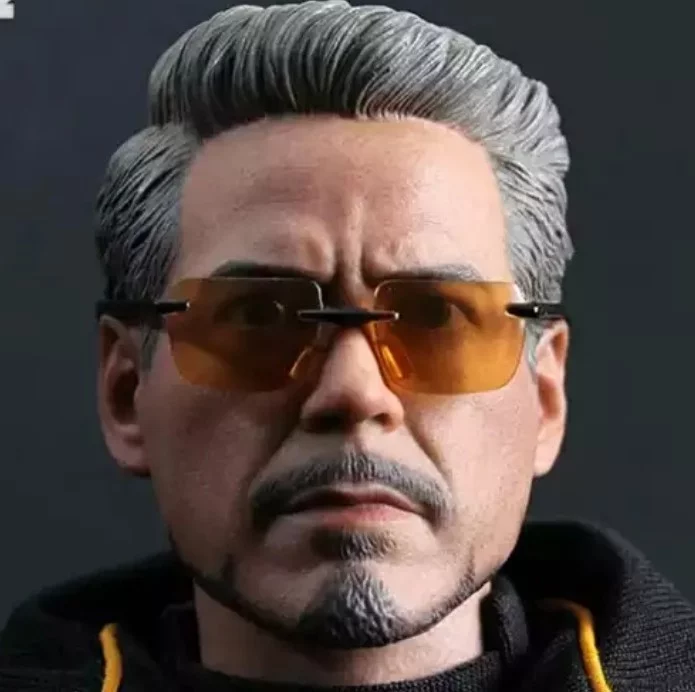

In [5]:
from google.colab.patches import cv2_imshow
cv2_imshow(img)

In [6]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


#loading model-- VGG


In [0]:
from keras.applications.vgg16 import VGG16, preprocess_input, decode_predictions
from keras.preprocessing import image
model = VGG16(weights="imagenet")
img_path = 'tony.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

In [16]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

#GradCam


In [0]:
from google.colab.patches import cv2_imshow
def gradCamImages(class_output,last_conv_layer):
  grads = K.gradients(class_output, last_conv_layer.output)[0]
  pooled_grads = K.mean(grads, axis=(0, 1, 2))
  iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])
  pooled_grads_value, conv_layer_output_value = iterate([x])
  for i in range(512):
      conv_layer_output_value[:, :, i] *= pooled_grads_value[i]

  heatmap = np.mean(conv_layer_output_value, axis=-1)
  heatmap = np.maximum(heatmap, 0)
  heatmap /= np.max(heatmap)

  img = cv2.imread(img_path)
  heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
  heatmap = np.uint8(255 * heatmap)
  heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
  superimposed_img = cv2.addWeighted(img, 0.6, heatmap, 0.4, 0)
  cv2_imshow(img)
  cv2_imshow(superimposed_img)

  cv2.waitKey(0)

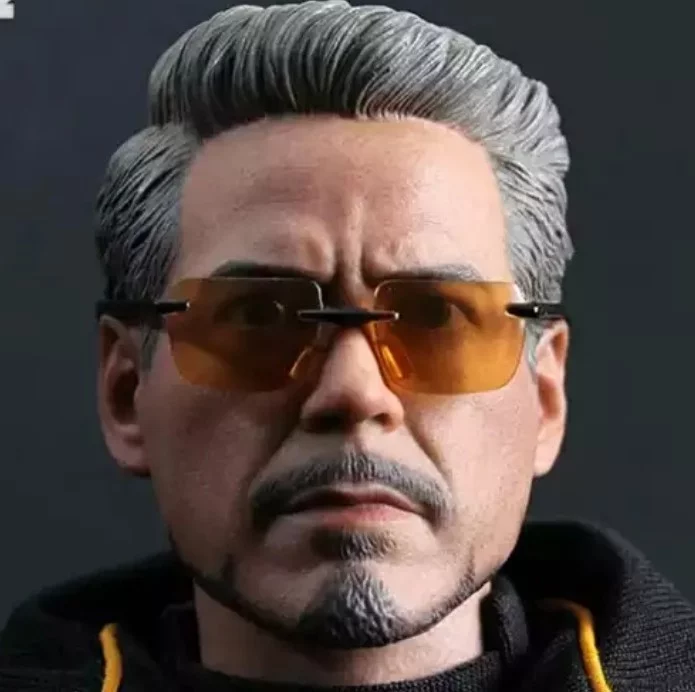

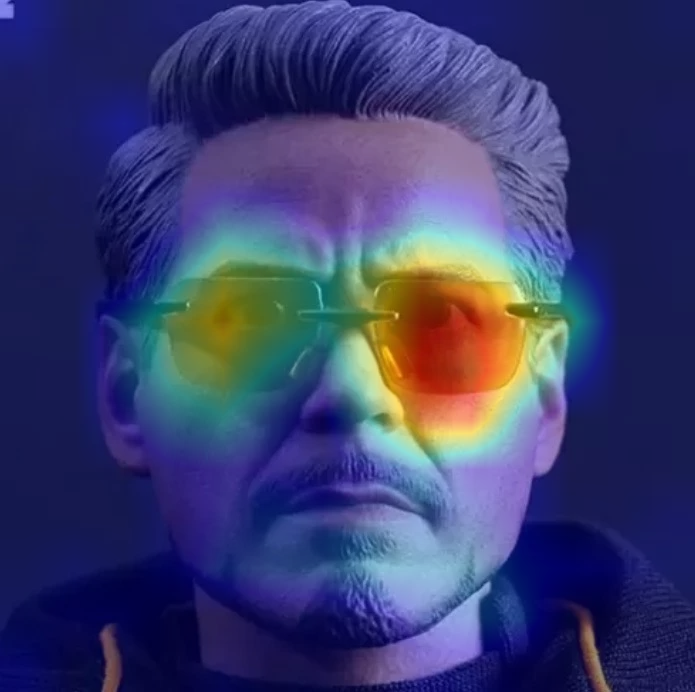

In [44]:
##837 sunglasses 
preds = model.predict(x)
#class_idx = np.argmax(preds[0])
class_idx=837
class_output = model.output[:, class_idx]
last_conv_layer = model.get_layer("block5_conv3")

gradCamImages(class_output,last_conv_layer)

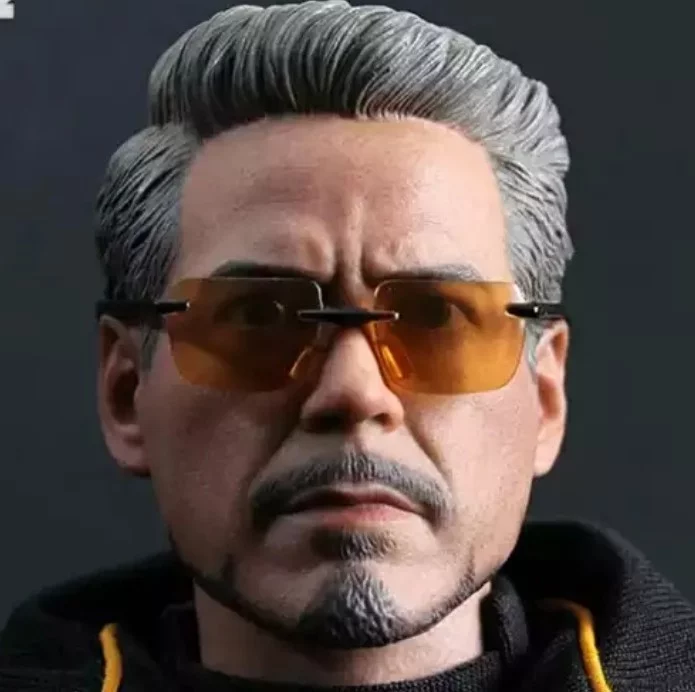

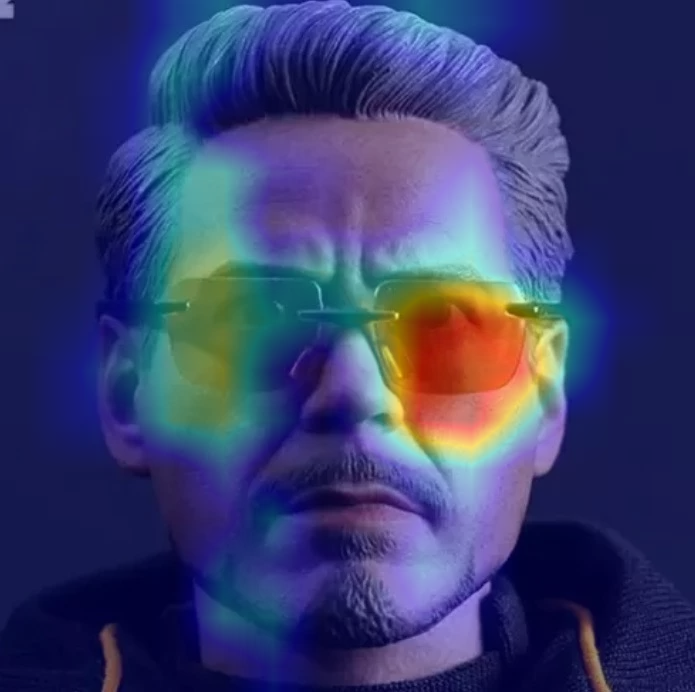

In [45]:
preds = model.predict(x)
#class_idx = np.argmax(preds[0])
class_idx=837
class_output = model.output[:, class_idx]
last_conv_layer = model.get_layer("block5_conv2")

gradCamImages(class_output,last_conv_layer)

#Assignment 10-B 


Receptive field increase explanation

--After maxpooling the increase in receptive field will be double from the previous (according to the academia) 


Convolution                  Receptive Field


 128 × 128 × 96                     3
 
 
 128 × 128 × 96                     5 
                      
                      
max pool    -- receptive field will be double here (increase from 2x to 4x) therefore 5 to 9 and it will continously increased till next max pool
                                               
                                               
 64 × 64 × 48                         9 
 
 
 64 × 64 × 48                        13
 
 
  max pool -- here receptive field again will becomes double 2x of previous one 
  that's why from 13 to 21 (increase of 8 , double of previous one 4)
  
  
 32 × 32 × 24                         21 
 
 
 32 × 32 × 24                         29 
 
 
  max pool -- here receptive field again will becomes double 2x of previous one 
  that's why from 29 to 45 (increase of 16 , double of previous one 8)
  
  
  
 16 × 16 × 12                         45 
 
 
 16 × 16 × 12                         53 
 
 
  unpooling 
                    
                    
 32 × 32 × 24                       61
 
 
 32 × 32 × 24                       65
 
 
  unpooling
                    
                    
 64 × 64 × 48                        69 
 
 
 64 × 64 × 48                        71
 
 
 unpooling
                    
                    
 128 × 128 × 96                    73 